# Step 0: Load useful libraries 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Step 1: Gather, clean and assess anime data

In [2]:
anime_df = pd.read_csv('anime.csv', na_values = ['Unknown'])

In [3]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266


In [8]:
anime_df.describe()

,anime_id,episodes,rating,members
count,12294.000000,11954.000000,12064.000000,1.229400e+04
mean,14058.221653,12.382550,6.473902,1.807134e+04
std,11455.294701,46.865352,1.026746,5.482068e+04
min,1.000000,1.000000,1.670000,5.000000e+00
25%,3484.250000,1.000000,5.880000,2.250000e+02
50%,10260.500000,2.000000,6.570000,1.550000e+03
75%,24794.500000,12.000000,7.180000,9.437000e+03
max,34527.000000,1818.000000,10.000000,1.013917e+06


In [4]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  11954 non-null  float64
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 672.5+ KB


# Step 2: Explore and visualize anime data

In [5]:
anime_df.sort_values(by = 'rating', ascending = False).head()

,anime_id,name,genre,type,episodes,rating,members
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1.0,10.00,13
10400,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,NaN,9.60,47
9595,23005,Mogura no Motoro,Slice of Life,Movie,1.0,9.50,62
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630
9078,33607,Kahei no Umi,Historical,Movie,1.0,9.33,44


The top 5 anime by ranking are all movies and one TV anime.

In [6]:
anime_df.sort_values(by = 'members', ascending = False).head()

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37.0,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25.0,8.54,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25.0,7.83,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13.0,8.39,717796


In [7]:
anime_df.sort_values(by = 'episodes', ascending = False).head()

,anime_id,name,genre,type,episodes,rating,members
6296,12393,Oyako Club,"Comedy, Slice of Life",TV,1818.0,6.18,160
929,2471,Doraemon (1979),"Adventure, Comedy, Fantasy, Kids, Sci-Fi, Shounen",TV,1787.0,7.76,14233
9243,23349,Kirin Monoshiri Yakata,Kids,TV,1565.0,5.56,116
5360,6277,Manga Nippon Mukashibanashi (1976),"Fantasy, Historical",TV,1471.0,6.48,406
6580,8213,Hoka Hoka Kazoku,Comedy,TV,1428.0,6.05,194


<AxesSubplot:>

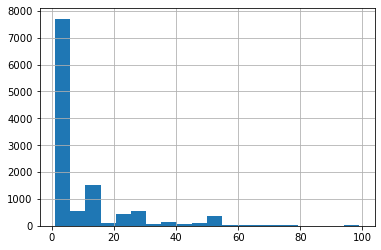

In [8]:
anime_df["episodes"].loc[anime_df["episodes"] < 100].hist(bins = 20)

<AxesSubplot:>

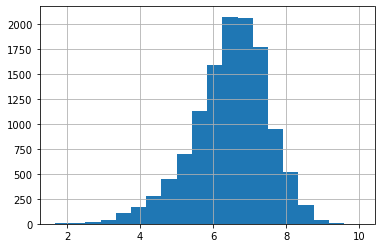

In [9]:
anime_df["rating"].hist(bins = 20)

<AxesSubplot:>

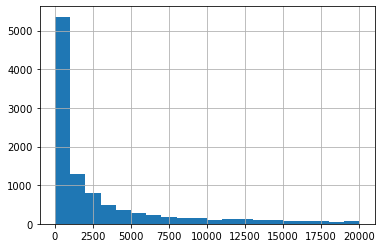

In [10]:
anime_df["members"].loc[anime_df["members"] < 20000].hist(bins = 20)

In [12]:
all_genres = []
def extract_single_value(column):
    for item in column:
        item = item.strip()
        all_genres.extend(item.split(', '))
    return all_genres

In [13]:
genre_column = anime_df["genre"]

In [15]:
genre_column = genre_column.astype(str)

In [17]:
all_genres = extract_single_value(genre_column)

In [18]:
genre_df = pd.DataFrame(all_genres, columns = ['genre'])

In [19]:
genre_df.head()

,genre
0,Drama
1,Romance
2,School
3,Supernatural
4,Action


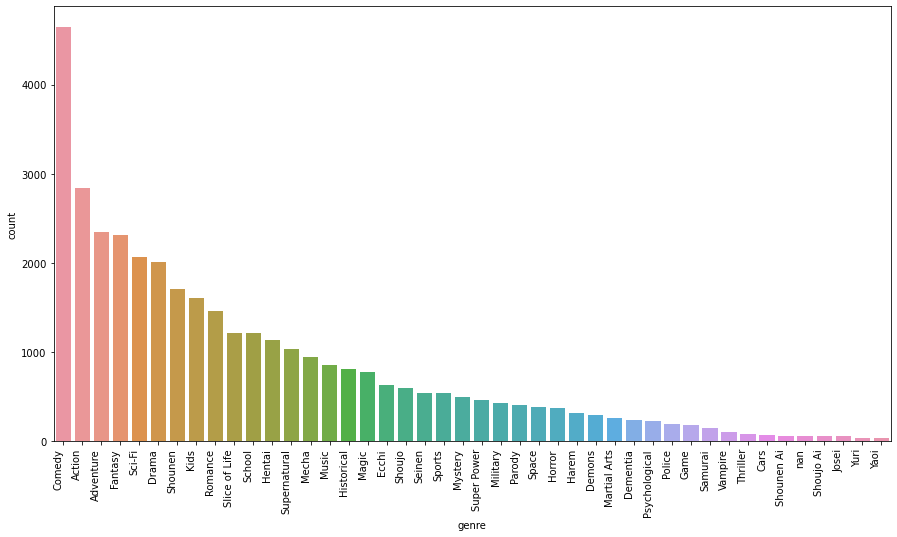

In [20]:
ax = sns.countplot(x="genre", data=genre_df, order=genre_df['genre'].value_counts().index)
plt.xticks(rotation = 90, ha = 'right')
plt.gcf().set_size_inches(15, 8)

In [21]:
genre_count_df = genre_df.groupby(['genre']).size().reset_index(name='counts')

In [22]:
genre_count_df.head()

,genre,counts
0,Action,2845
1,Adventure,2348
2,Cars,72
3,Comedy,4645
4,Dementia,240


In [23]:
sort_genre = genre_df.value_counts().sort_values(ascending=False)

In [24]:
sort_genre.head()

genre    
Comedy       4645
Action       2845
Adventure    2348
Fantasy      2309
Sci-Fi       2070
dtype: int64

In [25]:
sort_genre = sort_genre.head(20)

In [26]:
sort_type = anime_df["type"].value_counts().sort_values(ascending=False)

In [27]:
genre_df = pd.DataFrame(sort_genre, columns = ['counts'])

In [28]:
genre_df.head()

,counts
genre,
Comedy,4645
Action,2845
Adventure,2348
Fantasy,2309
Sci-Fi,2070


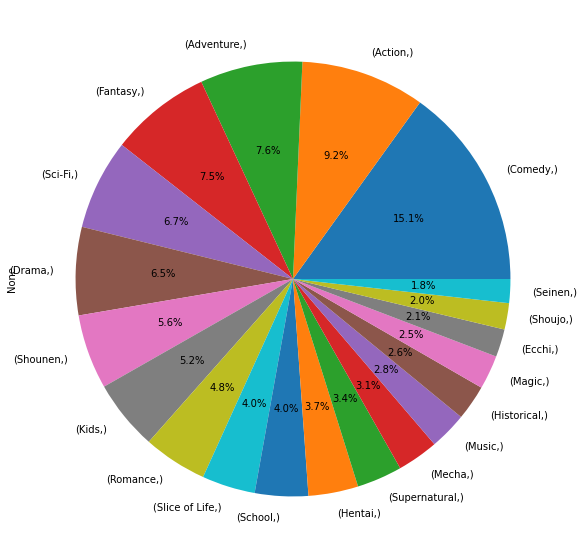

In [29]:
pie = sort_genre.plot.pie(autopct='%1.1f%%', figsize=(10, 10))

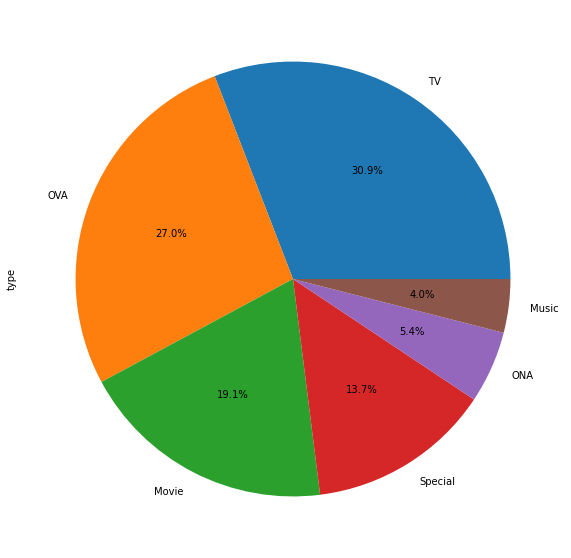

In [30]:
pie = sort_type.plot.pie(y = 'type', autopct='%1.1f%%', figsize=(10, 10))